In [109]:
import warnings
warnings.simplefilter(action = 'ignore')

import sklearn
from preamble import *
import matplotlib

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path ="C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [7]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('테스트 세트 점수 {:.2f}'.format(logreg.score(X_test, y_test)))

테스트 세트 점수 0.88


# 교차 검증
* 새롭게 추가한 데이터에 대해 정확도를 높이기 위해

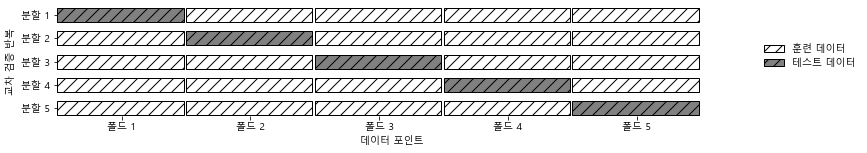

In [8]:
mglearn.plots.plot_cross_validation()

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

# cross_val_score의 기본값은 3겹(5겹) 교차 검증이므로 정확도 값이 3개 반환
scores = cross_val_score(logreg, iris.data, iris.target)
print('교차 검증 점수:', scores) # 임의로 설정하지 않아서 3겹 

교차 검증 점수: [0.961 0.922 0.958]


In [12]:
# cv=10: 교차검증 => 폴드 수는 cv매개변수를 사용하여 변경
# 모델, 훈련 데이터, 타깃 레이블
scores = cross_val_score(logreg, iris.data, iris.target, cv=10) 
print('교차 검증 점수:', scores)

교차 검증 점수: [1.    1.    1.    0.933 0.933 0.933 0.8   0.933 1.    1.   ]


In [14]:
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 평균 점수: 0.95


In [16]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target,
                      return_train_score=True)
res

{'fit_time': array([0.001, 0.   , 0.001]),
 'score_time': array([0.   , 0.001, 0.   ]),
 'test_score': array([0.961, 0.922, 0.958]),
 'train_score': array([0.949, 0.98 , 0.961])}

In [17]:
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수: \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,1.00e-03,0.00e+00,0.96,0.95
1,0.00e+00,9.99e-04,0.92,0.98
2,9.98e-04,0.00e+00,0.96,0.96


평균 시간과 점수: 
 fit_time       6.66e-04
score_time     3.33e-04
test_score     9.47e-01
train_score    9.63e-01
dtype: float64


# 교차 검증의 장점
## 계층별 k-겹 교차 검증과 그외 전략
* https://scikit-learn.org/stable/modules/cross_validation.html

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
print('iris 레이블: \n', iris.target)

iris 레이블: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2이다.
* 첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0이 된다.
*  두 번째, 세 번째도 같은 방법으로 정확도는 0이 된다.


* 단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 **계층별 k-겹 교차 검증**을 사용
* 예를 들어 90%가 클래스 A, 10%가 클래스 B인 데이터라면, 계층별 교차 검증은 각 폴드에 9:1 비율대로 만든다.


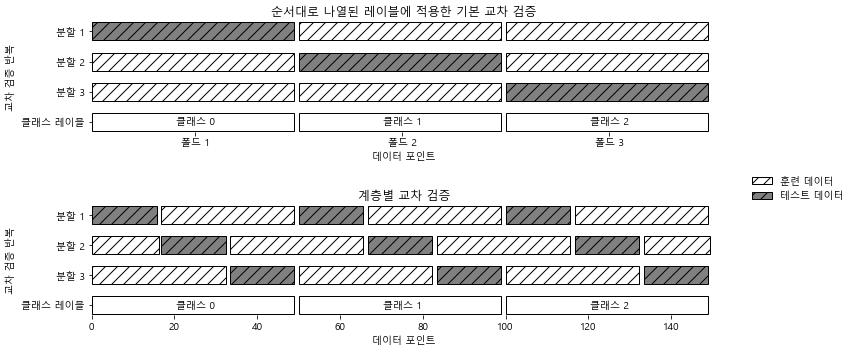

In [20]:
mglearn.plots.plot_stratified_cross_validation()

* 교차검증 상세 옵션

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [22]:
print('교차 검증 점수: \n',
     cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: 
 [1.    0.933 0.433 0.967 0.433]


In [24]:
kfold = KFold(n_splits=3)
print('교차 검증 점수:\n',
     cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


* n_splits=3일 때 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수가 없다.
* 데이터를 섞어서 샘플의 순서를 랜덤하게 만든다.(KFold의 shuffle 매개변수를 True)


In [26]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수: \n',
     cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수: 
 [0.9  0.96 0.96]


* 의료분야같은 경우, 99% 정도 되어야 높은 것으로 간주

# 타이타닉 생존자 예측

In [1]:
import warnings
warnings.simplefilter(action = 'ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_excel('../data/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### 변수 설명
* pclass : 1, 2, 3등석 
* survived : 생존 여부. survived(생존-1), dead(사망-0)
* name : 이름
* sex : 
* 성별 : female(여성), male(남성)
* age : 나이
* sibsp : 함께 탑승한 형제 또는 배우자의 수
* parch : 함께 탑승한 부모 또는 자녀의 수
* ticket : 티켓 번호
* fare : 티켓 요금
* cabin : 선실 번호
* embarked :탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)
* boat : 탈출한 보트가 있다면 boat 번호


In [3]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


* 평균 생존율: 38.2%
* 나이: 2개월 아기 ~ 80세

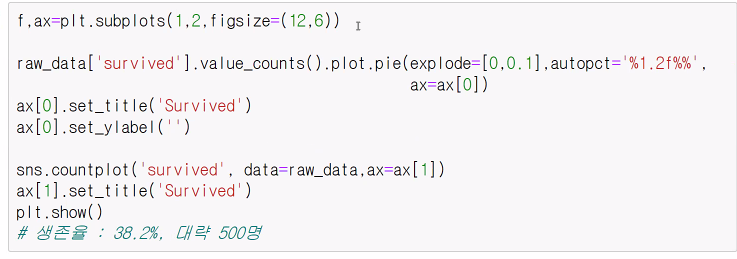

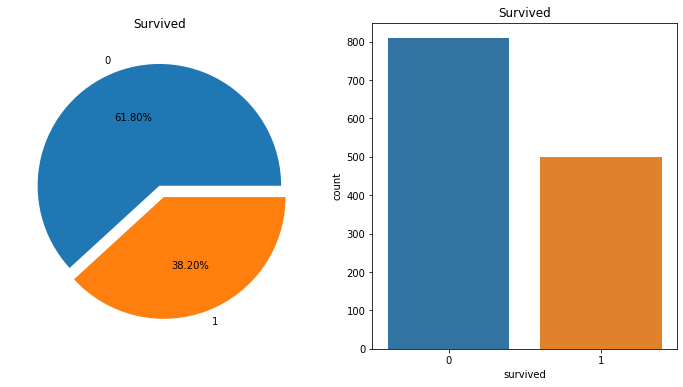

In [13]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

raw_data['survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                             autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<AxesSubplot:>

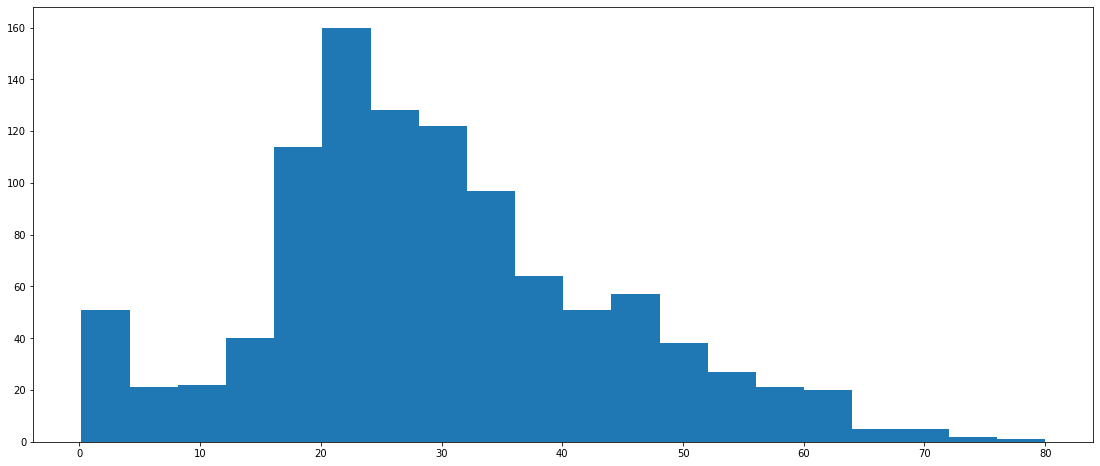

In [6]:
raw_data['age'].hist(bins=20, figsize=(19, 8), grid=False)

In [11]:
raw_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [14]:
raw_data.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


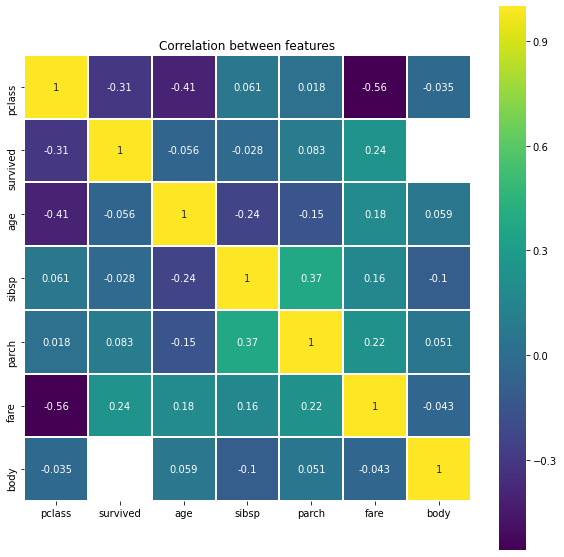

In [16]:
# 상관계수는 두 데이터의 상관관계만 확인
# 인과관계 아님

plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
           annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('Correlation between features')
plt.show()

In [17]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise', ordered: bool = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
    

In [18]:
raw_data['age_cat'] = pd.cut(raw_data['age'],
                            bins = [0, 3, 7, 16, 30, 60, 100],
                            include_lowest=True,
                            labels=['baby', 'chileren', 'teenage',
                                   'young', 'adult', 'old'])
raw_data.head(20)
raw_data.to_excel(excel_writer='titanic_age.xlsx')

In [22]:
raw_data.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
chileren,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.617647,0.470588,12.786765,1.455882,0.985294,34.338054,146.500000
young,2.406316,0.366316,23.685263,0.336842,0.225263,27.450227,169.238095
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


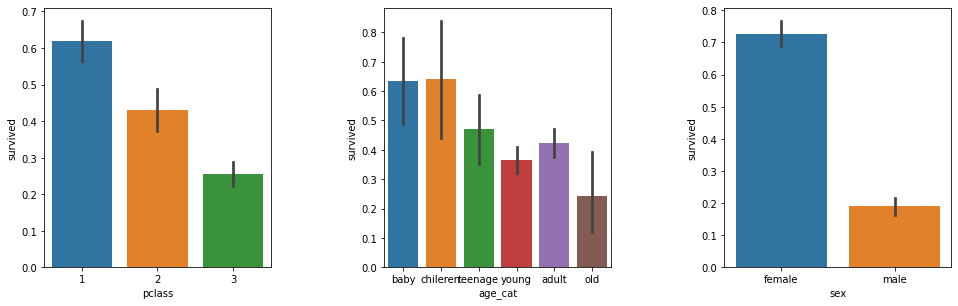

In [23]:
plt.figure(figsize=[14, 4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)

plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)

plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

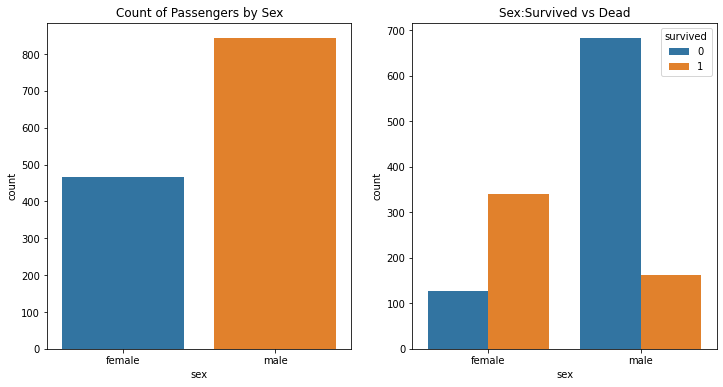

In [28]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [29]:
boat_survivors = raw_data[raw_data['boat'].notnull()]
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


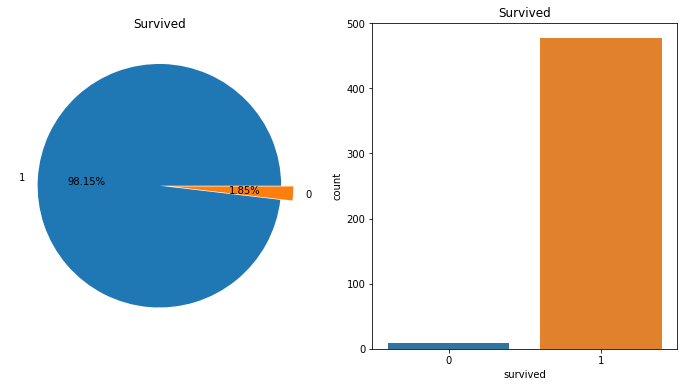

In [32]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

boat_survivors['survived'].value_counts().plot.pie(
explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [33]:
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


# 학습데이터 정리, 특징 선택

In [36]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.aeepnd(np.nan)

In [37]:
raw_data['sex'] = tmp
raw_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [38]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   int64   
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 123.7+ KB


# 생존자 예측 모델 생성

In [39]:
train_pre = raw_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
train_pre.head()

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,1,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre,
                                                   raw_data[['survived']],
                                                   test_size=0.1,
                                                   random_state=13)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    int64  
 1   sex     940 non-null    int64  
 2   age     940 non-null    float64
 3   sibsp   940 non-null    int64  
 4   parch   940 non-null    int64  
 5   fare    940 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 51.4 KB


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    int64  
 1   sex     940 non-null    int64  
 2   age     940 non-null    float64
 3   sibsp   940 non-null    int64  
 4   parch   940 non-null    int64  
 5   fare    940 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 51.4 KB


In [43]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  940 non-null    int64
dtypes: int64(1)
memory usage: 14.7 KB


In [44]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [45]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [46]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3,0,37.0,0,0,7.7500
1,2,1,34.0,0,0,13.0000
2,3,0,38.0,1,5,31.3875
3,2,1,31.0,0,0,13.0000
4,1,0,63.0,1,0,221.7792


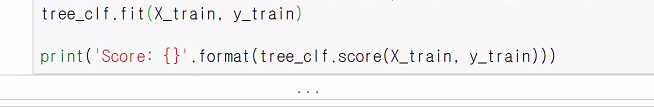

In [48]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.8117021276595745


C:\Users\user\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


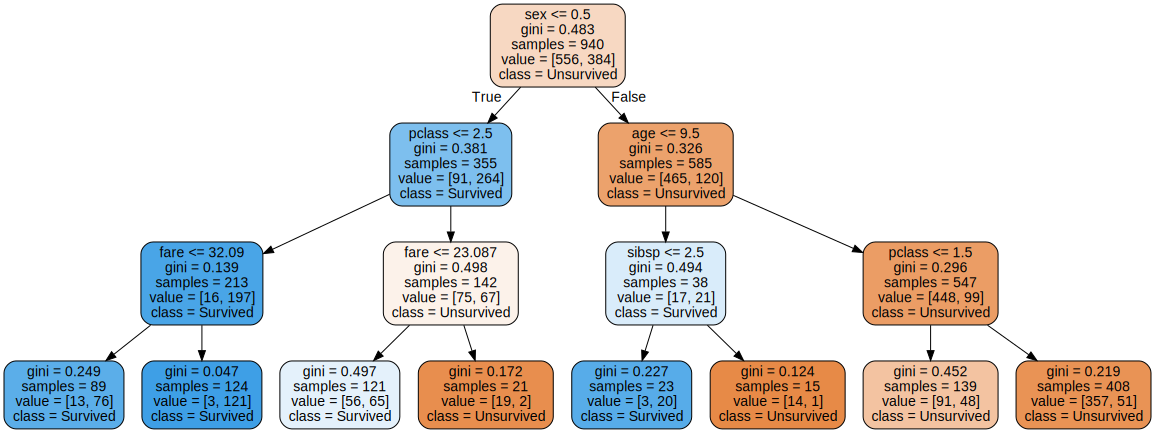

In [49]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="titanic.dot",
        feature_names=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
        class_names=['Unsurvived','Survived'],
        rounded=True,
        filled=True
    )

import graphviz
with open("titanic.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot


In [50]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test)
print('Test Accuracy is ', accuracy_score(y_test, y_pred))

Test Accuracy is  0.8476190476190476


In [97]:
# pclass, sex, age, sibsp, parch, fare
dicaprio = [2, 1, 32, 0, 0, 5]
winslet = [1, 0, 25, 1, 1, 100]

In [98]:
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [99]:
#  survived(생존-1), dead(사망-0)
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
print('Score: {}'.format(knn_clf.score(X_train, y_train)))

Score: 0.7723404255319148


In [112]:
Ran_clf = RandomForestClassifier(n_estimators=12)
Ran_clf.fit(X_train, y_train)
print('Score: {}'.format(Ran_clf.score(X_train, y_train)))

Score: 0.9659574468085106


In [113]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [119]:
kf_tree_clf = DecisionTreeClassifier()
sco = 'accuracy'
score = cross_val_score(kf_tree_clf, X_train, y_train, cv=k_fold, scoring=sco)
print(score)

[0.723 0.755 0.819 0.66  0.755 0.691 0.734 0.755 0.734 0.777]
